# **Machine Learning para clasificación de audios** - ANN

In [ ]:
# Librerías para el manejo de archivos y audio
from pathlib import Path
from scipy.io import wavfile
import os
import h5py
import zipfile
import h5py

# Librerías para la manipulación de datos y preprocesamiento
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from imblearn.over_sampling import SMOTE, ADASYN

# Librerías para el análisis y visualización de audio
import IPython.display as ipd
import librosa
import librosa.display

# Librerías específicas de TensorFlow y Keras para construir modelos de redes neuronales
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.layers import BatchNormalization


# Librerías específicas para la visualización de métricas de modelos
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier


#Importamos Drive:
from google.colab import drive
drive.mount('/content/drive')

#Libería Anaconda para aumnetado de imagenes
import imgaug.augmenters as iaa

In [ ]:
# leer los archivos y guardarlos
import librosa
from pathlib import Path

# Leer los archivos y guardarlos
Acrocephalus_Arundinacus = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus arundinaceus/").glob("*.mp3")
]
Acrocephalus_melanopogon = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus melanopogon/").glob("*.mp3")
]
Acrocephalus_scirpaceus = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus scirpaceus/").glob("*.mp3")
]
Alcedo_atthis = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Alcedo atthis/").glob("*.mp3")
]
Anas_platyrhynchos = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Anas platyrhynchos/").glob("*.mp3")
]
Anas_strepera= [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Anas strepera/").glob("*.mp3")
]
Ardea_purpurea = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ardea purpurea/").glob("*.mp3")
]
Botaurus_stellaris = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Botaurus stellaris/").glob("*.mp3")
]
Charadrius_alexandrinus = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Charadrius alexandrinus/").glob("*.mp3")
]
Ciconia_ciconia = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ciconia ciconia/").glob("*.mp3")
]
Circus_aeruginosus = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Circus aeruginosus/").glob("*.mp3")
]
Coracias_garrulus = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Coracias garrulus/").glob("*.mp3")
]
Dendrocopos_minor = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Dendrocopos minor/").glob("*.mp3")
]
Fulica_atra = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Fulica atra/").glob("*.mp3")
]
Gallinula_chloropus = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Gallinula chloropus/").glob("*.mp3")
]
Himantopus_himantopus = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Himantopus himantopus/").glob("*.mp3")
]
Ixobrychus_minutus = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ixobrychus minutus/").glob("*.mp3")
]
Motacilla_flava = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Motacilla flava/").glob("*.mp3")
]
Porphyrio_porphyrio = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Porphyrio porphyrio/").glob("*.mp3")
]
Tachybaptus_ruficollis = [
    librosa.load(p)[0] for p in Path("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Tachybaptus ruficollis").glob("*.mp3")
]

In [ ]:
Motacilla_flava[0].dtype

dtype('float32')

In [ ]:
# Escuchar un ejemplo de los Acrocephalus_Arundinacus
ipd.Audio("/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus arundinaceus/XC417157.mp3")

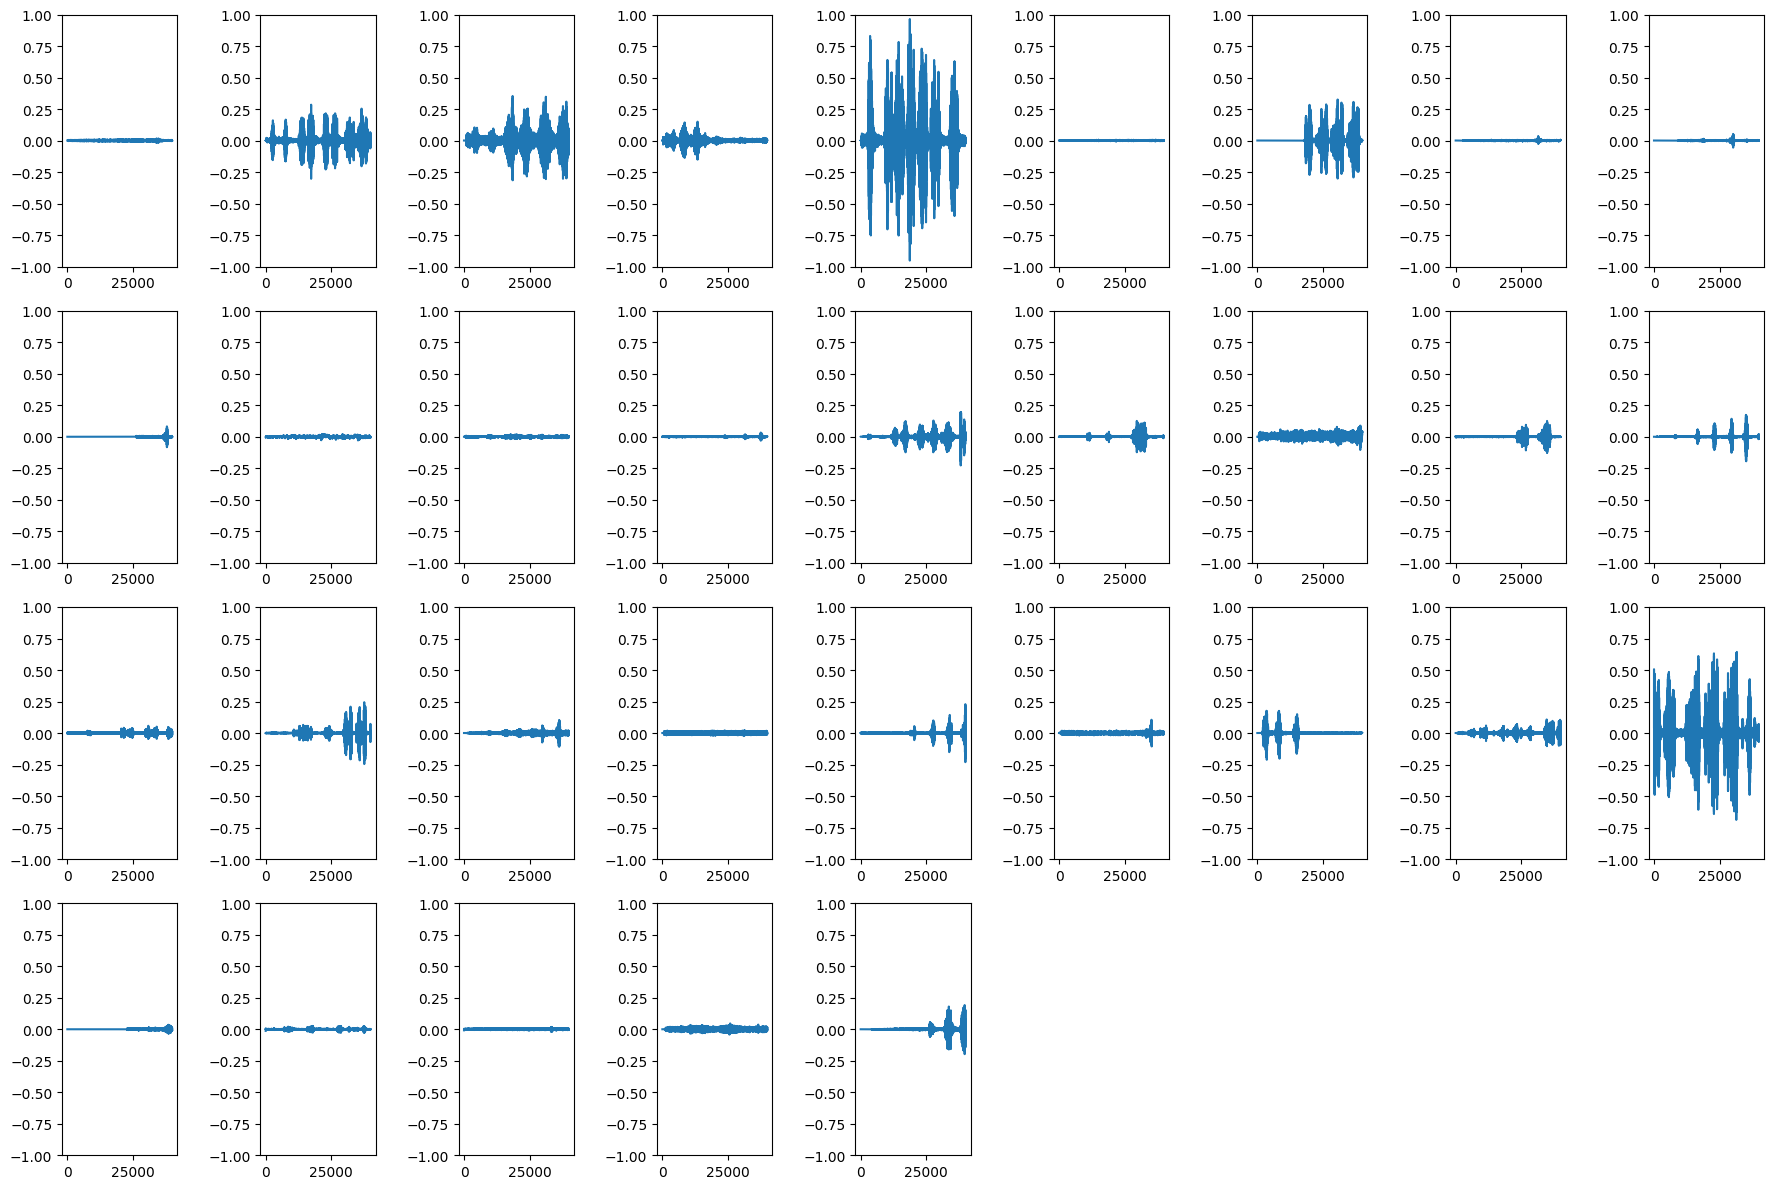

In [ ]:
#Graficar los audios de los Acrocephalus_Arundinacus:
plt.figure(figsize=(18, 12))
for i, x in enumerate(Acrocephalus_Arundinacus):
    plt.subplot(4, 9, i+1)
    plt.plot(x[:40000])
    plt.ylim(-1, 1)
    plt.tight_layout()

**Extraemos los Features para cada audio y creamos el dataset**

In [ ]:
def extract_features(folder_path):
    features_list = []

    # Obtener el nombre de la carpeta
    folder_name = Path(folder_path).name

    # Iterar sobre los archivos de audio en la carpeta
    for audio_file in Path(folder_path).glob("*.mp3"):
        # Cargar la señal de audio
        signal, sr = librosa.load(audio_file)

        # Calcular el Zero Crossing Rate (ZCR)
        zcr = librosa.feature.zero_crossing_rate(signal)

        # Calcular los Mel-Frequency Cepstral Coefficients (MFCCs)
        mfccs = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

        #Calculamos el Centroide espectral con Librosa:
        centroide_espectral = librosa.feature.spectral_centroid(y=signal, sr=sr)

        # Agregar las características a la lista
        #Cada iteración del bucle for itera sobre las columnas de zcr para procesar una ventana de tiempo de la señal de audio y con ello extraemos las caracteristicas específicas de dicha ventana de tiempo.
        for i in range(zcr.shape[1]):
          features_list.append([folder_name, audio_file.stem, zcr[0, i]] + mfccs[:, i].tolist() + [centroide_espectral[0, i]])

    return features_list

# Lista de las rutas de las carpetas
folder_paths = [
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus arundinaceus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus melanopogon/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus scirpaceus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Alcedo atthis/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Anas platyrhynchos/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Anas strepera/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ardea purpurea/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Botaurus stellaris/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Charadrius alexandrinus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ciconia ciconia/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Circus aeruginosus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Coracias garrulus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Dendrocopos minor/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Fulica atra/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Gallinula chloropus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Himantopus himantopus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ixobrychus minutus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Motacilla flava/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Porphyrio porphyrio/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Tachybaptus ruficollis/"
]

# Extraer las características de todas las señales de audio en las carpetas
all_features = []
for folder_path in folder_paths:
    all_features.extend(extract_features(folder_path))

# Crear un DataFrame de Pandas con las características extraídas
df = pd.DataFrame(all_features, columns=["Especie", "Nombre_Audio", "ZCR"] + [f"MFCC_{i}" for i in range(1, 14)] + ["centroide_espectral"])

# Ver el DataFrame
print(df)

                           Especie Nombre_Audio       ZCR      MFCC_1  \
0        Acrocephalus arundinaceus     XC417157  0.152832 -570.651855   
1        Acrocephalus arundinaceus     XC417157  0.232910 -510.952667   
2        Acrocephalus arundinaceus     XC417157  0.298340 -500.386078   
3        Acrocephalus arundinaceus     XC417157  0.291504 -500.009583   
4        Acrocephalus arundinaceus     XC417157  0.286133 -504.397491   
...                            ...          ...       ...         ...   
1755500     Tachybaptus ruficollis     XC518527  0.720215 -633.385132   
1755501     Tachybaptus ruficollis     XC518527  0.748535 -633.385132   
1755502     Tachybaptus ruficollis     XC518527  0.771973 -633.385132   
1755503     Tachybaptus ruficollis     XC518527  0.671387 -633.385132   
1755504     Tachybaptus ruficollis     XC518527  0.481934 -633.385132   

            MFCC_2     MFCC_3     MFCC_4     MFCC_5     MFCC_6     MFCC_7  \
0        52.967773 -18.622009  10.280311 -32.1

In [ ]:
#andres este es el codigo con el que podemos trabajar, he hecho algunos prints para ir revisando que todo marche bien, se puede quitar
def extract_features(folder_path):
    features_list = []  # Lista para almacenar las características extraídas

    # Obtener el nombre de la carpeta
    folder_name = Path(folder_path).name
    print(f"Procesando carpeta: {folder_name}")

    # Iterar sobre los archivos de audio en la carpeta
    for audio_file in Path(folder_path).glob("*.mp3"):
        print(f"Procesando archivo de audio: {audio_file}")

        # Cargar la señal de audio
        signal, sr = librosa.load(audio_file)

        # Obtener el nombre del archivo de audio sin la extensión
        audio_name = audio_file.stem

        # Obtener la ruta al archivo de texto correspondiente
        annotations_file = f"{audio_file.parent}/{audio_name}.txt"
        print(f"Archivo de anotaciones: {annotations_file}")

        # Leer las anotaciones del archivo de texto
        with open(annotations_file, 'r') as file:
            annotations = file.readlines()

        # Procesar cada línea de anotación
        for annotation in annotations:
            print(f"Procesando anotación: {annotation}")

            # Dividir la línea en tres valores: tiempo de inicio, tiempo final y "song"
            start_sec, end_sec, _ = annotation.strip().split()
            print(f"Tiempos de inicio y fin: {start_sec}, {end_sec}")

            # Convertir los tiempos de inicio y fin a números de punto flotante
            start_sec = float(start_sec)
            end_sec = float(end_sec)

            # Convertir los tiempos a índices de muestras
            start_idx = int(start_sec * sr)
            end_idx = int(end_sec * sr)

            # Comprobar si los índices están dentro del rango válido
            if start_idx >= 0 and end_idx <= len(signal):
                print("Índices dentro del rango válido")

                # Extraer la parte relevante de la señal de audio
                signal_part = signal[start_idx:end_idx]

                # Calcular las características de la parte de la señal de audio
                zcr = librosa.feature.zero_crossing_rate(signal_part)
                mfccs = librosa.feature.mfcc(y=signal_part, sr=sr, n_mfcc=13,n_fft=1024)

                # Agregar las características a la lista
                for i in range(mfccs.shape[1]):
                    features_list.append([folder_name, audio_name, zcr[0, i]] + mfccs[:, i].tolist())
            else:
                print("Los índices están fuera del rango válido. No se puede extraer la parte de la señal de audio.")

    return features_list

  #Lista de las rutas de las carpetas
folder_paths = [
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus arundinaceus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus melanopogon/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Acrocephalus scirpaceus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Alcedo atthis/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Anas platyrhynchos/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Anas strepera/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ardea purpurea/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Botaurus stellaris/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Charadrius alexandrinus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ciconia ciconia/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Circus aeruginosus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Coracias garrulus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Dendrocopos minor/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Fulica atra/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Gallinula chloropus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Himantopus himantopus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Ixobrychus minutus/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Motacilla flava/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Porphyrio porphyrio/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Tachybaptus ruficollis/"
]

#Extraer las características de todas las señales de audio en las carpetas
all_features = []
for folder_path in folder_paths:
    all_features.extend(extract_features(folder_path))

#Crear un DataFrame de Pandas con las características extraídas
df = pd.DataFrame(all_features, columns=["Especie", "Nombre_Audio", "ZCR"] + [f"MFCC_{i}" for i in range(1, 14)])

#Ver el DataFrame
print(df)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
Procesando anotación: 1.875801	3.946005	call

Tiempos de inicio y fin: 1.875801, 3.946005
Índices dentro del rango válido
Procesando anotación: 4.429412	4.707893	call

Tiempos de inicio y fin: 4.429412, 4.707893
Índices dentro del rango válido
Procesando anotación: 5.406720	5.816561	call

Tiempos de inicio y fin: 5.406720, 5.816561
Índices dentro del rango válido
Procesando anotación: 6.820139	7.072361	call

Tiempos de inicio y fin: 6.820139, 7.072361
Índices dentro del rango válido
Procesando anotación: 7.634562	7.897283	call

Tiempos de inicio y fin: 7.634562, 7.897283
Índices dentro del rango válido
Procesando archivo de audio: /content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Alcedo atthis/XC509443.mp3
Archivo de anotaciones: /content/drive/MyDrive/Proyecto Mineria de Datos/audio_files/Alcedo atthis/XC509443.txt
Procesando anotación: 0.657121	0.831135	call

Tiempos de inicio y fin: 0.657121, 0.831135
Índi

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=887
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=886
  warnings.warn(


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Tiempos de inicio y fin: 3.619707, 4.011541
Índices dentro del rango válido
Procesando anotación: 1.119497	1.473997	call

Tiempos de inicio y fin: 1.119497, 1.473997
Índices dentro del rango válido
Procesando anotación: 11.614783	12.062575	call

Tiempos de inicio y fin: 11.614783, 12.062575
Índices dentro del rango válido
Procesando anotación: 25.692459	26.074959	call

Tiempos de inicio y fin: 25.692459, 26.074959
Índices dentro del rango válido
Procesando anotación: 32.763950	33.081137	call

Tiempos de inicio y fin: 32.763950, 33.081137
Índices dentro del rango válido
Procesando anotación: 36.103783	36.486262	call

Tiempos de inicio y fin: 36.103783, 36.486262
Índices dentro del rango válido
Procesando anotación: 37.409863	37.801696	call

Tiempos de inicio y fin: 37.409863, 37.801696
Índices dentro del rango válido
Procesando anotación: 40.376530	40.777697	call

Tiempos de inicio y fin: 40.376530, 40.777697
Índices den

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:257: UserWarning: n_fft=1024 is too large for input signal of length=1007
  warnings.warn(


Se truncaron las últimas líneas 5000 del resultado de transmisión.
Procesando anotación: 58.060000	58.300000	song

Tiempos de inicio y fin: 58.060000, 58.300000
Índices dentro del rango válido
Procesando anotación: 62.100000	62.350000	song

Tiempos de inicio y fin: 62.100000, 62.350000
Índices dentro del rango válido
Procesando anotación: 64.370000	64.620000	song

Tiempos de inicio y fin: 64.370000, 64.620000
Índices dentro del rango válido
Procesando anotación: 66.620000	66.880000	song

Tiempos de inicio y fin: 66.620000, 66.880000
Índices dentro del rango válido
Procesando anotación: 69.350000	69.600000	song

Tiempos de inicio y fin: 69.350000, 69.600000
Índices dentro del rango válido
Procesando anotación: 73.160000	73.420000	song

Tiempos de inicio y fin: 73.160000, 73.420000
Índices dentro del rango válido
Procesando anotación: 75.850000	76.100000	song

Tiempos de inicio y fin: 75.850000, 76.100000
Índices dentro del rango válido
Procesando anotación: 78.680000	78.950000	song

Tie

**Se crea el Dataset con los Features**

In [ ]:
csv_filename = "/content/drive/MyDrive/Proyecto Mineria de Datos/CARPETA FINAL (NO TOCAR)/Dataset_Pajaros_Features_Audio_Final.csv"
df.to_csv(csv_filename, index=False)

print(f"El archivo CSV se ha creado con éxito en: {csv_filename}")

El archivo CSV se ha creado con éxito en: /content/drive/MyDrive/Proyecto Mineria de Datos/CARPETA FINAL (NO TOCAR)/Dataset_Pajaros_Features_Audio_Final.csv


**Ploteamos la distribución de audios por cada especie**

In [ ]:
dataset_pajaros_features = pd.read_csv("/content/drive/MyDrive/Proyecto Mineria de Datos/CARPETA FINAL (NO TOCAR)/Dataset_Pajaros_Features_Audio_Final.csv", index_col = None, sep =',')
dataset_pajaros_features

Especie Nombre_Audio       ZCR      MFCC_1  \
0       Acrocephalus arundinaceus     XC417157  0.124023 -529.779907   
1       Acrocephalus arundinaceus     XC417157  0.180176 -494.047180   
2       Acrocephalus arundinaceus     XC417157  0.234375 -439.205719   
3       Acrocephalus arundinaceus     XC417157  0.226562 -412.112122   
4       Acrocephalus arundinaceus     XC417157  0.218750 -359.968689   
...                           ...          ...       ...         ...   
516099     Tachybaptus ruficollis     XC518527  0.320312 -486.995056   
516100     Tachybaptus ruficollis     XC518527  0.313477 -499.817627   
516101     Tachybaptus ruficollis     XC518527  0.296387 -503.058228   
516102     Tachybaptus ruficollis     XC518527  0.239258 -492.775818   
516103     Tachybaptus ruficollis     XC518527  0.161621 -510.160492   

           MFCC_2      MFCC_3     MFCC_4     MFCC_5     MFCC_6     MFCC_7  \
0       53.188835  -21.022627  15.877716 -10.117560   4.505464   4.703397   
1       57.014755  -15.270870   0.154132 -10.710044   6.403300  -5.596688   
2       55.601654  -49.169914  26.791927  19.355724   4.738024  -5.430101   
3       29.842804  -98.413208  46.521858  38.899101 -28.511703  -9.483588   
4       40.367714 -104.717545  45.786652  36.640564 -12.324357  -6.541663   
...           ...         ...        ...        ...        ...        ...   
516099  26.501595  -13.936649  45.864616  -3.791536  19.861561  -3.036169   
516100  22.667671   -0.102709  49.313560 -11.057760  13.055786 -10.529148   
516101  27.474575   -7.443842  43.822800  -4.835726  16.583138 -17.667639   
516102  27.577475   -1.088347  44.515259  -2.677270  16.881878 -16.180393   
516103  41.566887   -1.707340  31.882835  -0.368670  14.377262 -19.712971   

           MFCC_8     MFCC_9    MFCC_10    MFCC_11    MFCC_12    MFCC_13  
0        4.002398   0.016115  -5.873896   3.634501   2.038351 -26.537067  
1        3.592380   7.673171  -1.821387  -2.017596   5.020749  -8.901441  
2       15.063786   9.023609  -4.263183  -6.737490   2.993178 -11.720543  
3       20.042686   1.172814 -11.631993  -4.632846   7.375851  -4.917129  
4       10.950802 -15.528755 -11.847819   4.377070  -1.460368 -15.512040  
...           ...        ...        ...        ...        ...        ...  
516099  -1.475280 -14.894768 -18.735203 -13.878830   1.077884   0.380307  
516100  -0.338951  -3.641804  -0.311730  -4.808976  12.446222   1.802506  
516101 -15.997893 -16.986574  -7.006792 -15.516605   3.451597   6.506546  
516102  -9.115377 -13.845127  -8.322535 -17.494820   3.233705   5.168744  
516103  -9.021320 -15.461349  -6.741443 -16.390558  -5.660588  -2.841062  

[516104 rows x 16 columns]

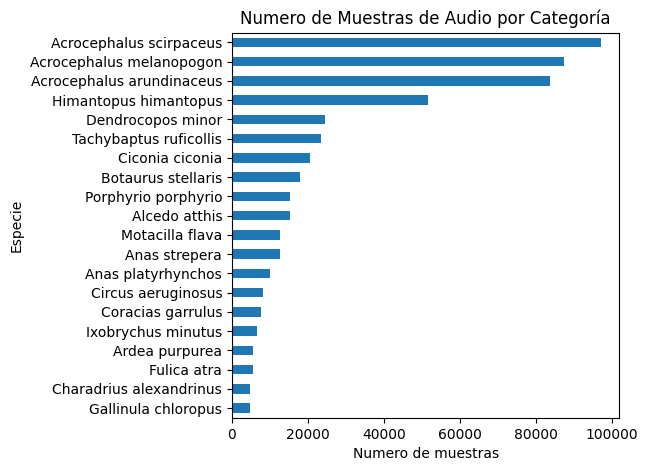

In [ ]:
category_group = dataset_pajaros_features['Especie'].value_counts().sort_values(ascending=True)
plot = category_group.plot(kind='barh', title="Numero de Muestras de Audio por Categoría", figsize=(5,5))
plot.set_xlabel("Numero de muestras")
plot.set_ylabel("Especie");

# **Modelo de ML (ANN)**

**Importamos Dataframe**

In [ ]:
dataset_pajaros_features_final = pd.read_csv('/content/drive/MyDrive/Proyecto Mineria de Datos/CARPETA FINAL (NO TOCAR)/Dataset_Pajaros_Features_Audio_Final.csv')

In [ ]:
dataset_pajaros_features_final.head(5)

Especie Nombre_Audio       ZCR      MFCC_1     MFCC_2  \
0  Acrocephalus arundinaceus     XC417157  0.124023 -529.779907  53.188835   
1  Acrocephalus arundinaceus     XC417157  0.180176 -494.047180  57.014755   
2  Acrocephalus arundinaceus     XC417157  0.234375 -439.205719  55.601654   
3  Acrocephalus arundinaceus     XC417157  0.226562 -412.112122  29.842804   
4  Acrocephalus arundinaceus     XC417157  0.218750 -359.968689  40.367714   

       MFCC_3     MFCC_4     MFCC_5     MFCC_6    MFCC_7     MFCC_8  \
0  -21.022627  15.877716 -10.117560   4.505464  4.703397   4.002398   
1  -15.270870   0.154132 -10.710044   6.403300 -5.596688   3.592380   
2  -49.169914  26.791927  19.355724   4.738024 -5.430101  15.063786   
3  -98.413208  46.521858  38.899101 -28.511703 -9.483588  20.042686   
4 -104.717545  45.786652  36.640564 -12.324357 -6.541663  10.950802   

      MFCC_9    MFCC_10   MFCC_11   MFCC_12    MFCC_13  
0   0.016115  -5.873896  3.634501  2.038351 -26.537067  
1   7.673171  -1.821387 -2.017596  5.020749  -8.901441  
2   9.023609  -4.263183 -6.737490  2.993178 -11.720543  
3   1.172814 -11.631993 -4.632846  7.375851  -4.917129  
4 -15.528755 -11.847819  4.377070 -1.460368 -15.512040

**Pre-procesamiento de los datos**

In [ ]:
X = dataset_pajaros_features_final.drop(['Especie','Nombre_Audio'], axis = 1)
y = dataset_pajaros_features_final['Especie']

In [ ]:
#Dividimos datos de Train y Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)

In [ ]:
#Codificamos las etiquetas
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

**Equilibrando Clases con SMOTE y ADASYN: Optimizando la Distribución de Datos**





In [ ]:
#Aplicamos SMOTE (Synthetic Minority Over-sampling Technique) y ADASYN para equilibrar las clases
smote = SMOTE(random_state=45)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

'''#ADASYN
adasyn = ADASYN(random_state=42)
X_res_adasyn, y_res_adasyn = adasyn.fit_resample(X_train, y_train)'''

**Printamos información sobre la cantidad de muestras en los conjuntos de datos después de aplicar el sobremuestreo con SMOTE**

In [ ]:
print("Número de muestras en X_res_smote:", len(X_resampled))
print("Número de muestras en y_test_encoded:", len(y_resampled))

Número de muestras en X_res_adasyn: 3285380
Número de muestras en y_test_encoded: 3285380


In [ ]:
print("Tamaño de X después del sobremuestreo:", X_resampled.shape)
print("Tamaño de y después del sobremuestreo:", y_resampled.shape)

Tamaño de X después del sobremuestreo: (3285380, 15)
Tamaño de y después del sobremuestreo: (3285380,)


**Normalización de Características**

In [ ]:
#Escalamos los datos
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

**Construimos el Modelo con los procesos anteriores y calculamos su Accuracy**

In [ ]:
#Dividir los datos en características (X) y etiquetas (y)
X = dataset_pajaros_features_final.drop(['Especie','Nombre_Audio'], axis=1)
y = dataset_pajaros_features_final['Especie']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=45)

#Aplicar SMOTE para el balanceo de clases
smote = SMOTE(random_state=45)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

#Escalar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

#Obtener el número de clases únicas después de la codificación de etiquetas
num_classes = len(label_encoder.classes_)

#Definir el modelo
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

#Compilar el modelo
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Entrenar el modelo
history = model.fit(X_train_scaled, y_resampled, epochs=10, batch_size=32, validation_split=0.2)

#Evaluar el modelo en el conjunto de test y train
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test)
print("Test Accuracy:", test_accuracy)

train_loss, train_accuracy = model.evaluate(X_train_scaled, y_resampled)
print("Train Accuracy:", train_accuracy)

Epoch 1/10
38915/38915 [==============================] - 131s 3ms/step - loss: 0.4550 - accuracy: 0.8585 - val_loss: 0.8964 - val_accuracy: 0.7288
Epoch 2/10
38915/38915 [==============================] - 126s 3ms/step - loss: 0.2552 - accuracy: 0.9211 - val_loss: 0.7987 - val_accuracy: 0.7653
Epoch 3/10
38915/38915 [==============================] - 140s 4ms/step - loss: 0.2133 - accuracy: 0.9340 - val_loss: 0.6393 - val_accuracy: 0.8102
Epoch 4/10
38915/38915 [==============================] - 133s 3ms/step - loss: 0.1919 - accuracy: 0.9406 - val_loss: 0.5478 - val_accuracy: 0.8366
Epoch 5/10
38915/38915 [==============================] - 126s 3ms/step - loss: 0.1782 - accuracy: 0.9449 - val_loss: 0.5446 - val_accuracy: 0.8383
Epoch 6/10
38915/38915 [==============================] - 127s 3ms/step - loss: 0.1684 - accuracy: 0.9480 - val_loss: 0.5899 - val_accuracy: 0.8274
Epoch 7/10
38915/38915 [==============================] - 130s 3ms/step - loss: 0.1604 - accuracy: 0.9506 - val_

**Ploteamos la Curva de Aprendizaje para Training Loss y Training Accuracy**

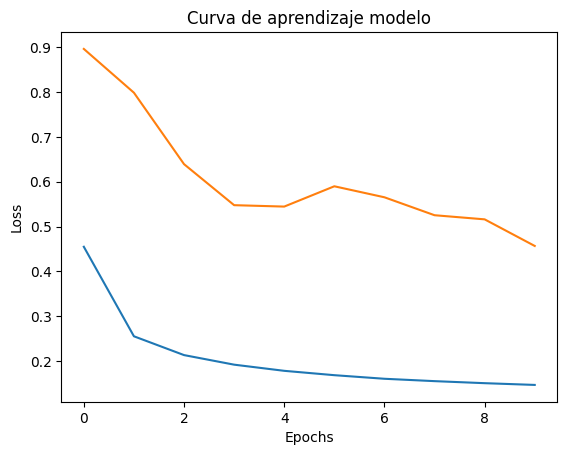

In [ ]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Curva de aprendizaje modelo')
plt.show()

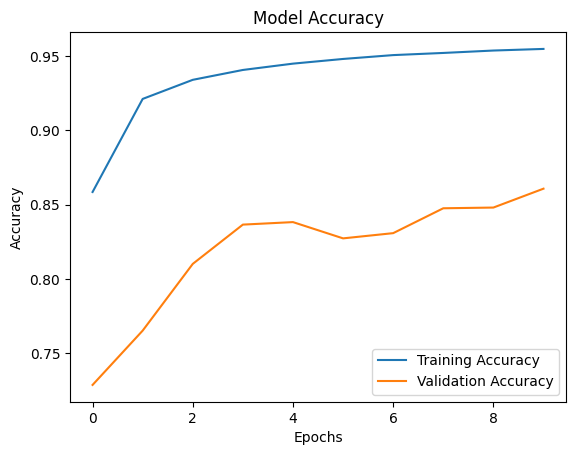

In [ ]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#Hacemos las predicciones del conjunto de prueba
y_pred_prob = model.predict(X_test_scaled)

#Convertimos las predicciones de probabilidad en clases
y_pred = y_pred_prob.argmax(axis=-1)

#Se obtiene la matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)
print("\n")
print("*"*85)
#Se obtiene el informe de clasificación
class_report = classification_report(y_test, y_pred)
print("Classification Report:")
print(class_report)


3226/3226 [==============================] - 6s 2ms/step
Confusion Matrix:
[[14923   493   560    78    31    22    57    49   107    22    28    39
     26    28    19   117    10    45    17    65]
 [  301 15573   606    70    26    37    22    12   151    29   183    89
     34    45    64   102     4    68    30    77]
 [  430   593 17582   122    15    27    30    11    94    37    46    79
     19    12    16   132     5    38    11    71]
 [   26    30    49  2820     1     1     1     8     3     1    11     3
     15    10     2    14     0    30     2     3]
 [    1    15     4     2  1876    21    13    16    14     8     6    32
     17     3     6     5     1     1    20     2]
 [    2     9     2     3     8  2429     3     1    10    11     8     8
      8     2     5     5     4     0     7    17]
 [   11    14     3     1    12    10   997     1     7    17     5    24
     18     2    11     9     1     0     9    12]
 [   10     3     0     2     3     0     4  3537 

# **Modelo de Machine Learning: Árbol de Decisión**



In [ ]:
#Crear un árbol de decisión
DT = DecisionTreeClassifier(max_depth=40, random_state=0)

#Ajustar el modelo a los datos con los datos balanceados
DT.fit(X_train_scaled, y_resampled)

#Realizar predicciones sobre los datos de prueba
y_test_dt = DT.predict(X_test_scaled)

#Calcular y mostrar la precisión del modelo
print("Accuracy Score (Decision Tree):", round(accuracy_score(y_test, y_test_dt), 2))

Accuracy Score (Decision Tree): 0.74


In [ ]:
precision = precision_score(y_test, y_test_dt, average='weighted')
print(precision)

0.7493560387640216


In [ ]:
recall = recall_score(y_test, y_test_dt, average='weighted')
print(recall)

0.742620203253214


In [ ]:
f1 = f1_score(y_test, y_test_dt, average='weighted')
print(f1)

0.7447018635686662


In [ ]:
conf_matrix = confusion_matrix(y_test, y_test_dt)
print(conf_matrix)

[[12567  1007  1138   168    84    50    92    74   194    66    96    76
     27    57    44   432    19   184   112   249]
 [ 1024 12324  1496   158    43    86    82    15   181    92   313   128
     46    63    80   556    17   350   175   294]
 [ 1220  1428 14443   224    34    53    56    11   142    80   143    75
     27    58    52   611    15   234   102   362]
 [   77    79   105  2444     1     6     6    12     7     9    21     5
     17    10     7    58     7   133    13    13]
 [   30    36    19    10  1549    29    45    15    28    40    17    35
     38     9    10    26    11     2    91    23]
 [   33    39    35     3    26  2030    17     0    22    60    17    12
     45    15    14    33    28     7    47    59]
 [   34    27    27     5    31    16   736     7    14    40    13    36
     45    14    16    33     3     0    33    34]
 [   31    21     9     6    15     1    10  3280    34    16    22     5
     19    16    13    56    18    16    52     4]


# **Random Forest: Ensamble**


In [ ]:
# Dividir los datos en características (X) y etiquetas (y)
X = dataset_pajaros_features_final.drop(['Especie','Nombre_Audio'], axis=1)
y = dataset_pajaros_features_final['Especie']

# Codificar las etiquetas
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=45)


# Aplicar SMOTE para el balanceo de clases
smote = SMOTE(random_state=45)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)


# Escalar los datos
scaler = StandardScaler()
X_train_sc = scaler.fit_transform(X_resampled)
X_test_scaled = scaler.transform(X_test)

# Obtener el número de clases únicas después de la codificación de etiquetas
num_classes = len(label_encoder.classes_)


#Ajustamos el modelo a los datos, profundidad=10, cantidad de arboles=100
RF = RandomForestClassifier(max_depth=15, n_estimators = 200, random_state=0)
RF.fit(X_train_sc, y_resampled)


#Realizamos prediccion sobre los datos de prueba
y_test_rf = RF.predict(X_test_scaled)


print("Accuracy Score:", round(accuracy_score(y_test, y_test_rf),2))

Accuracy Score: 0.77


In [ ]:
#Precisión (Accuracy): Mide la proporción de predicciones correctas
#(tanto positivas como negativas) sobre el total de predicciones realizadas.

precision = precision_score(y_test, y_test_rf, average='weighted')
print("Precision Score:", round(precision, 2))

Precision Score: 0.8


In [ ]:
#Recall (Sensibilidad): También conocido como tasa de verdaderos positivos,
# mide la proporción de instancias positivas que fueron correctamente identificadas por el modelo.

recall = recall_score(y_test, y_test_rf, average='weighted')
print("Recall Score:", round(recall, 2))

Recall Score: 0.77


In [ ]:
#F1-score: Es una medida que combina la precisión y el recall en un solo número.
#Es particularmente útil cuando las clases están desbalanceadas.

f1 = f1_score(y_test, y_test_rf, average='weighted')
print("F1 Score:", round(f1, 2))

F1 Score: 0.78


In [ ]:
#Matriz de confusion
confusion_matrix(y_test, y_test_rf)

array([[12398,   468,  1608,   282,   140,    67,    33,   152,   228,
           12,   134,    56,    19,    74,   108,   360,     4,   157,
          141,   295],
       [  760, 11263,  1911,   279,    70,    72,    23,    19,   316,
           21,   634,   155,    32,   152,   297,   544,     3,   395,
          225,   352],
       [  804,   651, 14993,   401,    31,    58,    36,    15,   215,
           11,   269,    83,    23,   290,   104,   632,    11,   149,
          155,   439],
       [   22,    12,    59,  2730,     2,     3,     2,     5,     2,
            1,    22,     2,     2,    26,     5,    43,     2,    73,
           13,     4],
       [    5,     5,     2,     1,  1850,     9,    22,    15,    23,
           12,    11,    27,    20,     1,    10,     6,     7,     0,
           24,    13],
       [    1,     9,     2,     1,    28,  2341,    12,     0,     6,
           12,     1,     9,    21,     5,     9,     4,    13,     1,
           27,    40],
       [  

# **CNN para clasificación de espectrogramas: Deep Learning**

In [ ]:
# Lista de las rutas de las carpetas
folder_paths = [
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus arundinaceus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus melanopogon/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus scirpaceus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Alcedo atthis/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Anas platyrhynchos/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Anas (Mareca) strepera/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ardea purpurea/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Botaurus stellaris/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Charadrius alexandrinus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ciconia ciconia/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Circus aeruginosus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Coracias garrulus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Dendrocopos minor/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Fulica atra/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Gallinula chloropus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Himantopus himantopus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ixobrychus minutus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Motacilla flava/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Porphyrio porphyrio/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Tachybaptus ruficollis/train/"
]


**Realizamos un plot de los espectogramas por cada especie**

<Figure size 3000x3000 with 0 Axes>

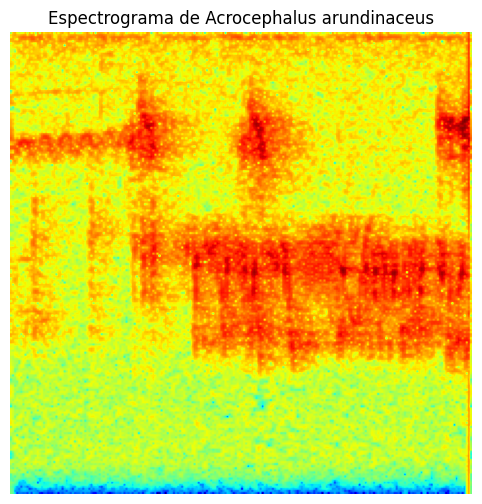

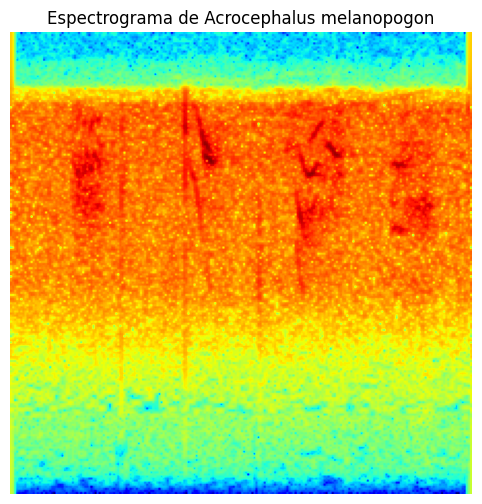

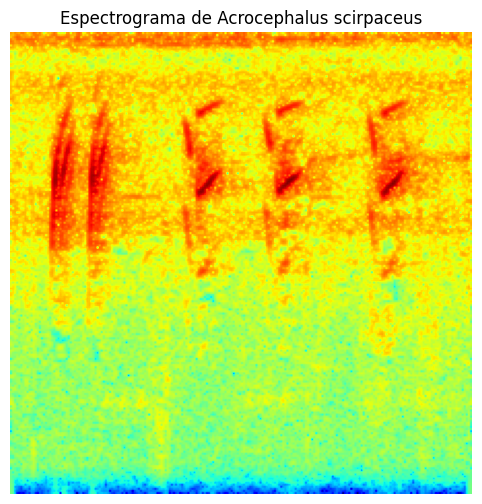

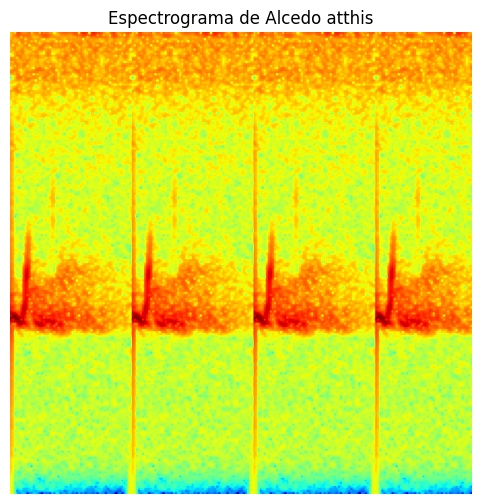

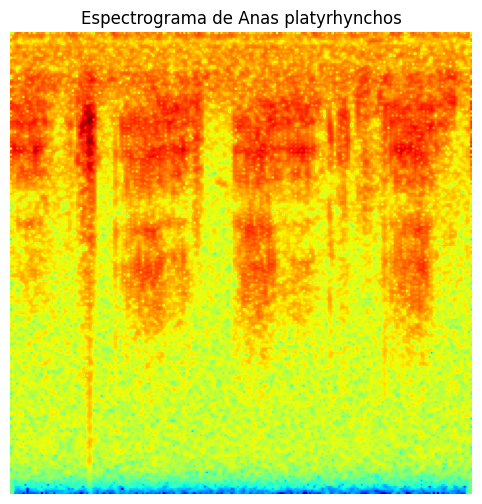

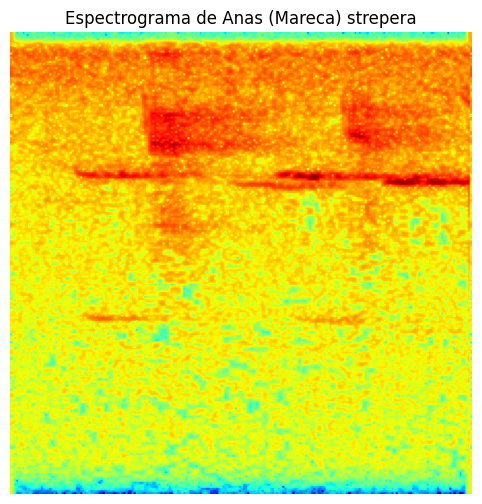

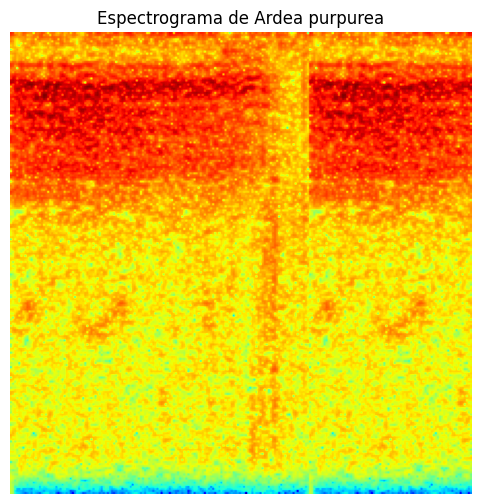

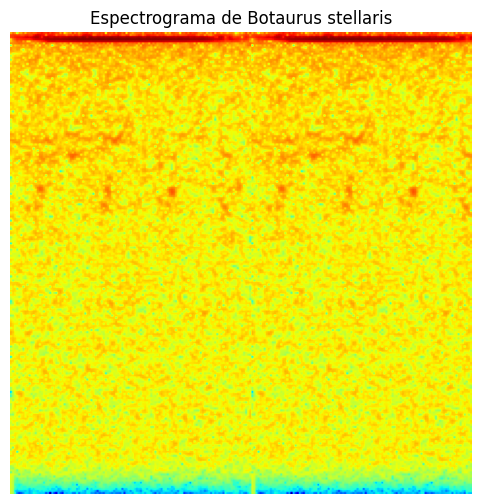

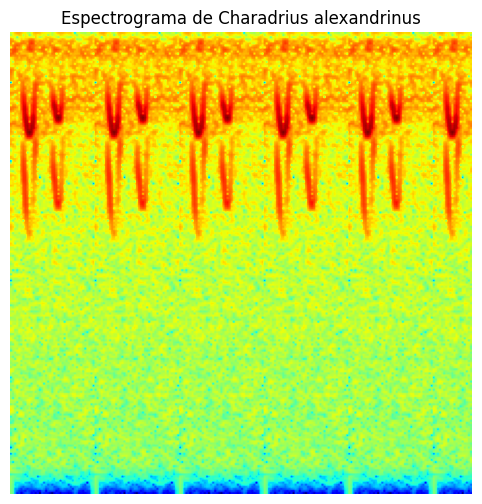

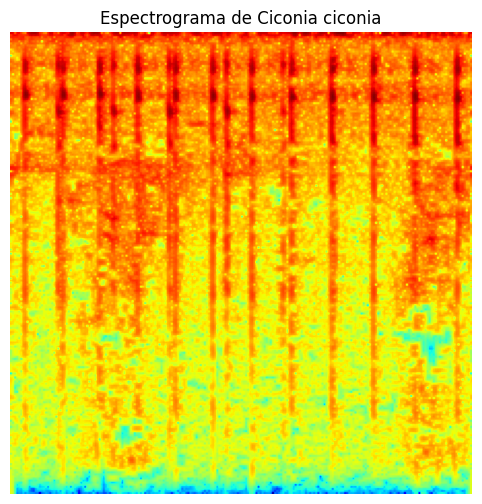

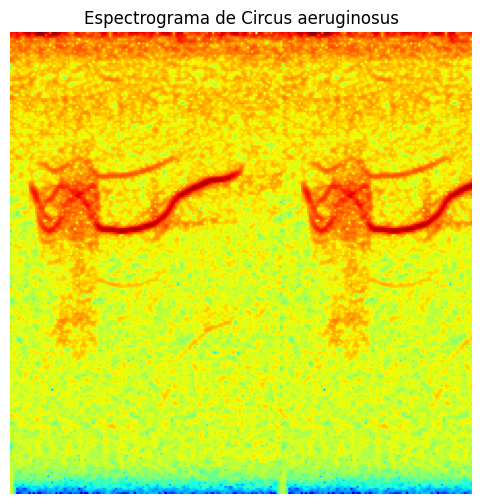

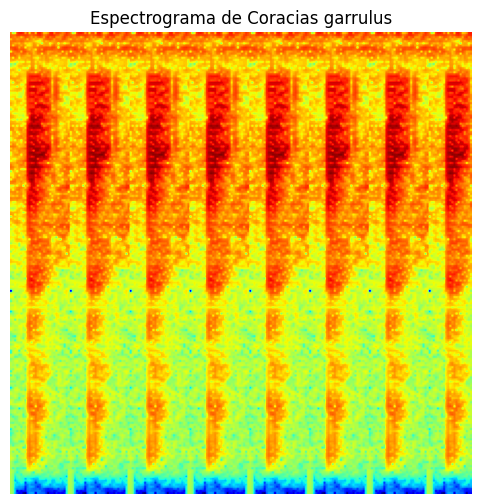

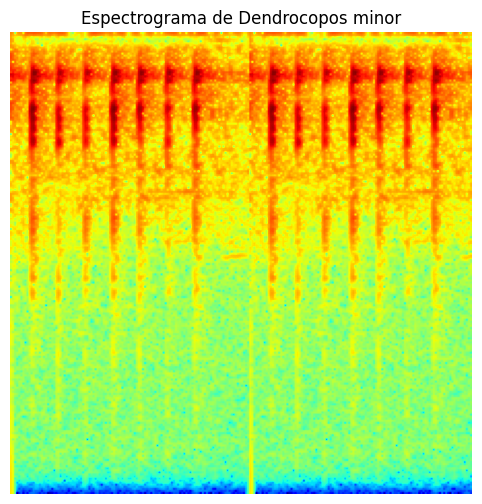

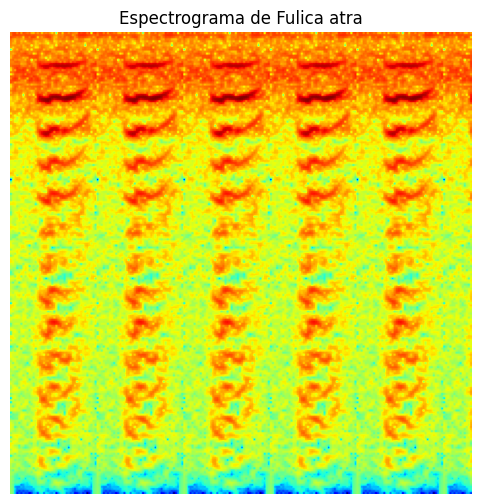

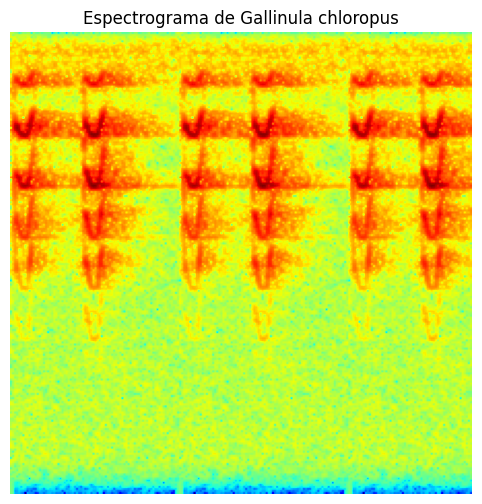

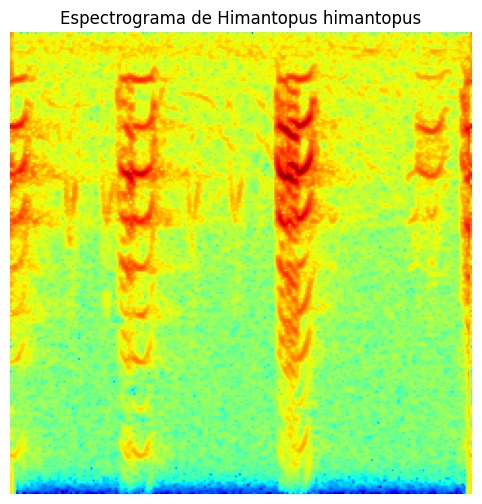

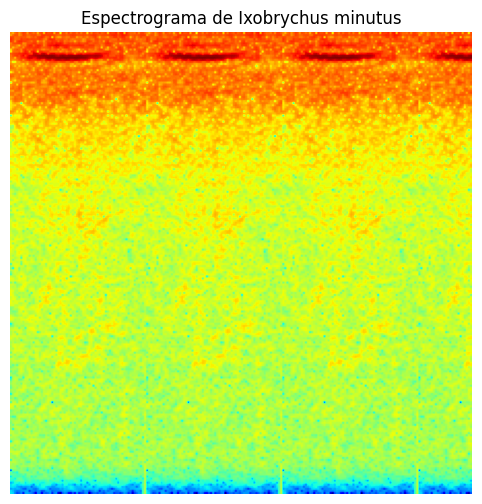

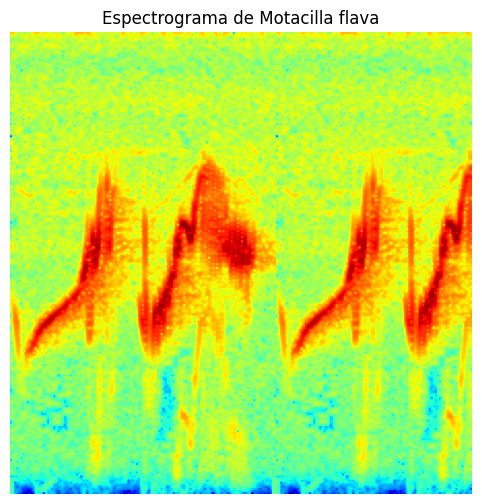

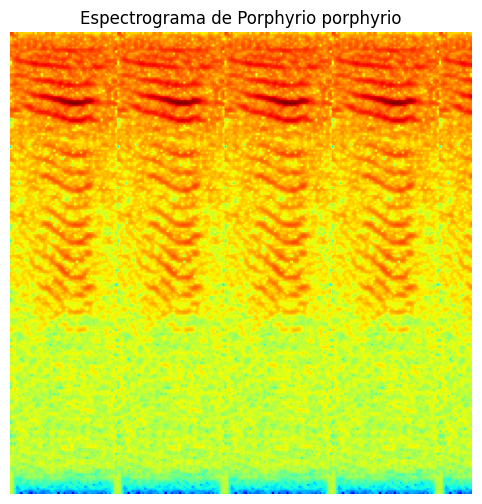

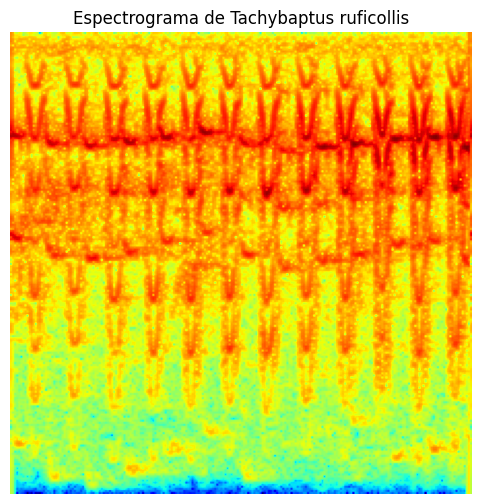

El número de especies impresas fueron: 20


In [ ]:
plt.figure(figsize= (30,30))

numero_imagenes = 0

for folder_path in folder_paths:
  especies = folder_path.split('/')[-3]
  archivos_espectrogramas = [archivo for archivo in os.listdir(folder_path) if archivo.endswith('.npy')]

  if archivos_espectrogramas:
    primer_espectograma = os.path.join(folder_path, archivos_espectrogramas[0])
    espectogramas = np.load(primer_espectograma)

    plt.figure(figsize=(8, 6))
    plt.imshow(espectogramas, cmap='jet')
    plt.title(f'Espectrograma de {especies}')
    plt.axis('off')
    plt.show()
    numero_imagenes += 1
print(f'El número de especies impresas fueron: {numero_imagenes}')

**Realizamos Aumentado de Datos para enriquecer los espectogramas**

In [ ]:
#Secuencia de aumento de datos
seq = iaa.Sequential([
    iaa.Crop(px=(1, 10), keep_size=True),
    iaa.GaussianBlur(sigma=(0, 3.0))
])

#Aplicar aumentos de datos de manera aleatoria
augmented_spectrogram = iaa.Sequential(seq, random_order=True)(image=espectogramas)

**Integramos todo en una única función y convertimos los espectogramas a un Archivo HDF5**

In [ ]:
#Lista de las rutas de las carpetas
folder_paths = [
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus arundinaceus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus melanopogon/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus scirpaceus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Alcedo atthis/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Anas platyrhynchos/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Anas (Mareca) strepera/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ardea purpurea/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Botaurus stellaris/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Charadrius alexandrinus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ciconia ciconia/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Circus aeruginosus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Coracias garrulus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Dendrocopos minor/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Fulica atra/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Gallinula chloropus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Himantopus himantopus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ixobrychus minutus/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Motacilla flava/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Porphyrio porphyrio/train/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Tachybaptus ruficollis/train/"
]

#Secuencia de aumento de datos
seq = iaa.Sequential([
    iaa.Crop(px=(1, 10), keep_size=True),
    iaa.GaussianBlur(sigma=(0, 3.0))
])

#Ruta archivo HDF5 salida
output_file_path = '/content/drive/MyDrive/Proyecto Mineria de Datos/Dataset_Espectogramas_Train.h5'

#Creamos archivo HDF5
with h5py.File(output_file_path, 'w') as hdf_file:
    for folder_path in folder_paths:
        especie = folder_path.split('/')[-3]
        archivos_espectrogramas = [archivo for archivo in os.listdir(folder_path) if archivo.endswith('.npy')]

        if archivos_espectrogramas:
            for archivo in archivos_espectrogramas:
                ruta_archivo = os.path.join(folder_path, archivo)
                espectrograma = np.load(ruta_archivo)

                # Aplicar aumentos de datos
                espectrograma_aug = seq.augment_image(espectrograma)

                # Guardar el espectrograma aumentado en el archivo HDF5
                hdf_file.create_dataset(f'{especie}/{archivo}', data=espectrograma_aug)


In [ ]:
#Lista de las rutas de las carpetas
folder_paths = [
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus arundinaceus/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus melanopogon/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Acrocephalus scirpaceus/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Alcedo atthis/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Anas platyrhynchos/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Anas (Mareca) strepera/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ardea purpurea/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Botaurus stellaris/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Charadrius alexandrinus/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ciconia ciconia/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Circus aeruginosus/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Coracias garrulus/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Dendrocopos minor/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Fulica atra/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Gallinula chloropus/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Himantopus himantopus/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Ixobrychus minutus/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Motacilla flava/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Porphyrio porphyrio/test/",
    "/content/drive/MyDrive/Proyecto Mineria de Datos/spectrograms/Tachybaptus ruficollis/test/"
]

#Ruta archivo HDF5 salida
output_file_path = '/content/drive/MyDrive/Proyecto Mineria de Datos/Dataset_Espectogramas_Test.h5'

#Creamos archivo HDF5
with h5py.File(output_file_path, 'w') as hdf_file:
    for folder_path in folder_paths:
        especie = folder_path.split('/')[-3]
        archivos_espectrogramas = [archivo for archivo in os.listdir(folder_path) if archivo.endswith('.npy')]

        if archivos_espectrogramas:
            for archivo in archivos_espectrogramas:
                ruta_archivo = os.path.join(folder_path, archivo)
                espectrograma = np.load(ruta_archivo)


                #Guardamos el espectrograma aumentado en el archivo HDF5
                hdf_file.create_dataset(f'{especie}/{archivo}', data=espectrograma)

**Creamos el Modelo CNN**



*   **Pre-procesamiento de Datos**




In [ ]:
def cargar_archivos_hdf5(input_file_path):
  X = []
  y = []

  with h5py.File(input_file_path, 'r') as hdf_file:
      for especie in hdf_file.keys():
          for archivo in hdf_file[especie]:
              espectrograma = np.array(hdf_file[f'{especie}/{archivo}'])
              X.append(espectrograma)
              y.append(especie)

  X = np.array(X)
  y = np.array(y)

  #Convertimos etiquetas
  label_encoder = LabelEncoder()
  y_encoded = label_encoder.fit_transform(y)
  y_categorical = to_categorical(y_encoded)

  return X, y_categorical


ruta_train_hdf5 = '/content/drive/MyDrive/Proyecto Mineria de Datos/CARPETA FINAL (NO TOCAR)/Dataset_Espectogramas_Train.h5'
ruta_test_hdf5 = '/content/drive/MyDrive/Proyecto Mineria de Datos/CARPETA FINAL (NO TOCAR)/Dataset_Espectogramas_Test.h5'

#Cargamos datos de entrenamiento
X_train, y_train = cargar_archivos_hdf5(ruta_train_hdf5)

#Cargamos datos de prueba
X_test, y_test = cargar_archivos_hdf5(ruta_test_hdf5)

In [ ]:
#Normalizar los datos de entrenamiento y prueba
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train = X_train.reshape((-1, 224, 224, 1))
X_test = X_test.reshape((-1, 224, 224, 1))

In [ ]:
num_clases = y_train.shape[1]

In [ ]:
#Printamos los valores de train despues de normalizar para verificar que esten correctos
print(X_train[:5])

[[[[-0.10863337]
   [-0.118266  ]
   [-0.15996496]
   ...
   [-0.1750377 ]
   [-0.15146059]
   [-0.10863337]]

  [[-0.1087103 ]
   [-0.1175971 ]
   [-0.1664063 ]
   ...
   [-0.18748751]
   [-0.15505463]
   [-0.1087103 ]]

  [[-0.10986151]
   [-0.11674763]
   [-0.168204  ]
   ...
   [-0.1515703 ]
   [-0.1589187 ]
   [-0.10986151]]

  ...

  [[-0.09276985]
   [-0.10185888]
   [-0.15321383]
   ...
   [-0.15398629]
   [-0.1231795 ]
   [-0.09276985]]

  [[-0.09281638]
   [-0.10186298]
   [-0.15206571]
   ...
   [-0.15306848]
   [-0.12315119]
   [-0.09281638]]

  [[-0.09282614]
   [-0.10189614]
   [-0.15266041]
   ...
   [-0.15357198]
   [-0.1232425 ]
   [-0.09282614]]]


 [[[-0.11600035]
   [-0.12583259]
   [-0.1779613 ]
   ...
   [-0.14221762]
   [-0.11514563]
   [-0.11600035]]

  [[-0.11528305]
   [-0.12399614]
   [-0.16581905]
   ...
   [-0.145251  ]
   [-0.11562441]
   [-0.11528305]]

  [[-0.11186401]
   [-0.12247585]
   [-0.16231902]
   ...
   [-0.14886516]
   [-0.11548042]
   [-0.1118

In [ ]:
#Printamos los valores de test despues de normalizar para verificar que esten correctos
print(X_test[:5])

[[[[-0.0888957 ]
   [-0.09308589]
   [-0.09809506]
   ...
   [-0.13427837]
   [-0.15632957]
   [-0.10928958]]

  [[-0.0915669 ]
   [-0.10454261]
   [-0.10887308]
   ...
   [-0.11292151]
   [-0.10601298]
   [-0.101469  ]]

  [[-0.08961345]
   [-0.0982905 ]
   [-0.12056448]
   ...
   [-0.12141141]
   [-0.10187106]
   [-0.09718449]]

  ...

  [[-0.12696671]
   [-0.13602574]
   [-0.18646862]
   ...
   [-0.3137255 ]
   [-0.30071366]
   [-0.29279324]]

  [[-0.12702592]
   [-0.1360893 ]
   [-0.18670967]
   ...
   [-0.2953733 ]
   [-0.30146068]
   [-0.3137255 ]]

  [[-0.12704906]
   [-0.13611282]
   [-0.18678549]
   ...
   [-0.29817536]
   [-0.3137255 ]
   [-0.2962256 ]]]


 [[[-0.09818371]
   [-0.11705387]
   [-0.12424958]
   ...
   [-0.10686723]
   [-0.09145255]
   [-0.09818371]]

  [[-0.08686274]
   [-0.09276989]
   [-0.10184021]
   ...
   [-0.11912686]
   [-0.09639622]
   [-0.08686274]]

  [[-0.08122488]
   [-0.08494676]
   [-0.09561467]
   ...
   [-0.15548505]
   [-0.10298254]
   [-0.0812

In [ ]:
model = Sequential([
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(224, 224, 1)),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.2),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.3),
    Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.4),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(num_clases, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

Integramos el Early Stopping para validar que el modelo sí este mejorando y no lo contrario

In [ ]:
parar_Modelo = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

In [ ]:
history = model.fit(X_train, y_train, validation_split = 0.1, batch_size = 256, epochs=10, callbacks=[parar_Modelo])

Epoch 1/10
49/49 [==============================] - 85s 1s/step - loss: 2.1038 - accuracy: 0.3174 - val_loss: 8.7567 - val_accuracy: 0.0144
Epoch 2/10
49/49 [==============================] - 56s 1s/step - loss: 1.2403 - accuracy: 0.6087 - val_loss: 11.4829 - val_accuracy: 0.0151
Epoch 3/10
49/49 [==============================] - 56s 1s/step - loss: 0.9461 - accuracy: 0.6922 - val_loss: 12.0382 - val_accuracy: 0.0151
Epoch 4/10
49/49 [==============================] - 57s 1s/step - loss: 0.7082 - accuracy: 0.7772 - val_loss: 11.5681 - val_accuracy: 0.0151
Epoch 5/10
49/49 [==============================] - 57s 1s/step - loss: 0.5536 - accuracy: 0.8192 - val_loss: 13.0673 - val_accuracy: 0.0151
Epoch 6/10
49/49 [==============================] - 56s 1s/step - loss: 0.4539 - accuracy: 0.8499 - val_loss: 14.7249 - val_accuracy: 0.0151
Epoch 6: early stopping


In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 112, 112, 64)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 112, 112, 64)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 112, 112, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 56, 56, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 56, 56, 64)        0

In [ ]:
#Predecir clases en el conjunto de prueba
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)  # Asegúrate de que y_test esté codificado como one-hot

163/163 [==============================] - 4s 15ms/step


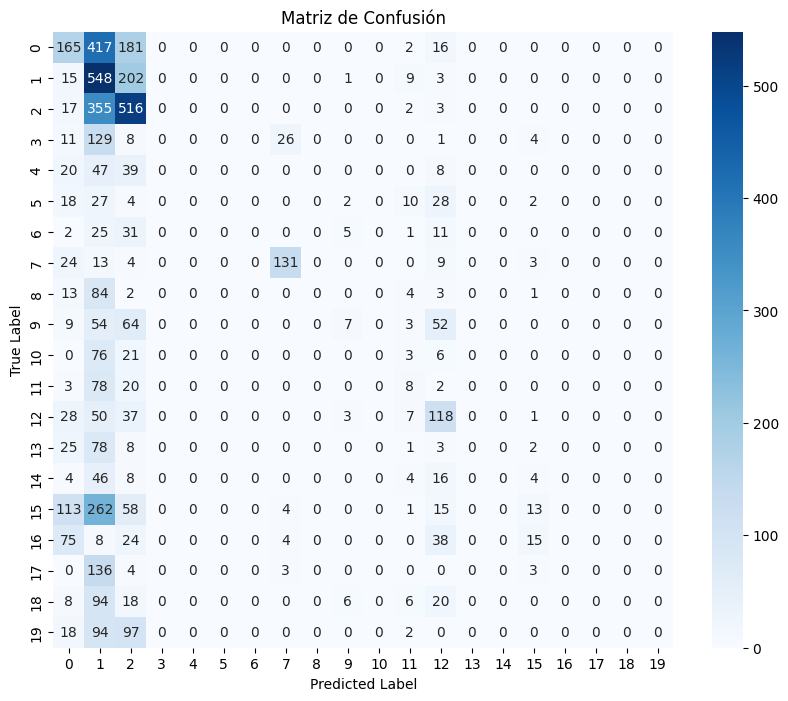

In [ ]:
conf_matrix = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión')
plt.show()

print("\n")
print("*"*85)
report = classification_report(y_true, y_pred_classes)
print(report)